In [1]:
import torch 
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
print(torch .__version__)
print(torchvision.__version__)

2.0.1
0.15.2a0


In [2]:
train_data = datasets.FashionMNIST(root='data',
                                   train=True,
                                   download =True,
                                   transform =torchvision.transforms.ToTensor(),
                                  target_transform =None)

test_data = datasets.FashionMNIST(root='data',
                                   train=False,
                                   download =True,
                                   transform =ToTensor(),
                                  target_transform =None)

In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
image.shape,label

(torch.Size([1, 28, 28]), 9)

In [6]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
image.shape

torch.Size([1, 28, 28])

In [10]:
class_names[label]

'Ankle boot'

(-0.5, 27.5, 27.5, -0.5)

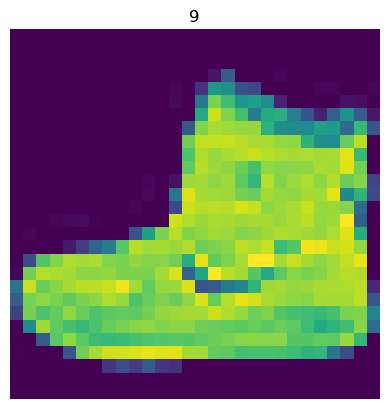

In [11]:
plt.imshow(image.squeeze())
plt.title(label)
plt.axis(False)

(-0.5, 27.5, 27.5, -0.5)

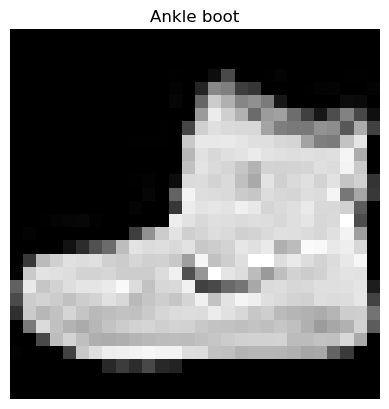

In [12]:
plt.imshow(image.squeeze(),cmap = 'gray')
plt.title(class_names[label])
plt.axis(False)

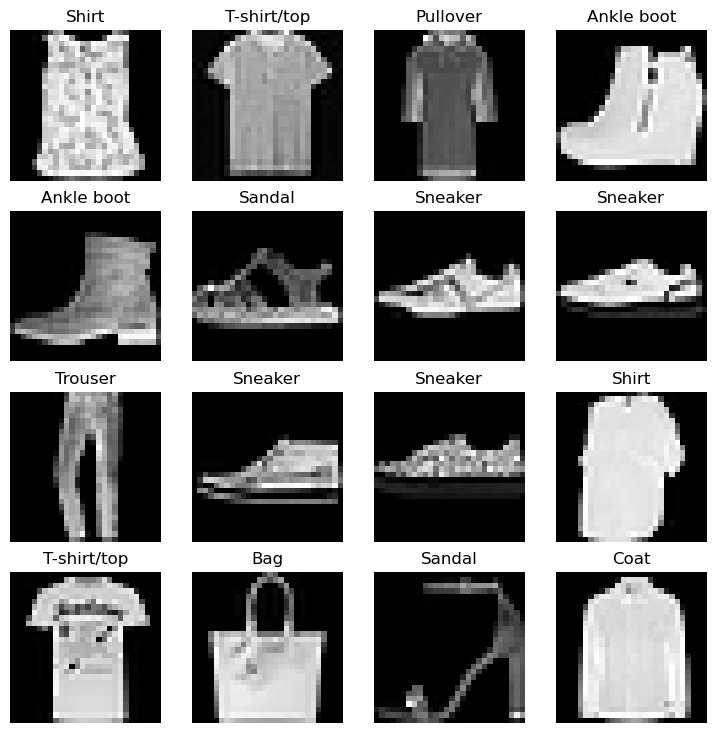

In [13]:
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1,rows*cols +1) :
    random_idx = torch.randint(0,len(train_data),size =[1]).item()
    img,label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [14]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [15]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader =DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader =DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1bfdc39e090>,
 <torch.utils.data.dataloader.DataLoader at 0x1bfdb342f50>)

In [16]:
len(train_dataloader),len(test_dataloader)

(1875, 313)

In [17]:
60000/128

468.75

In [18]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size : torch.Size([1, 28, 28])
label :0,label_size : torch.Size([])


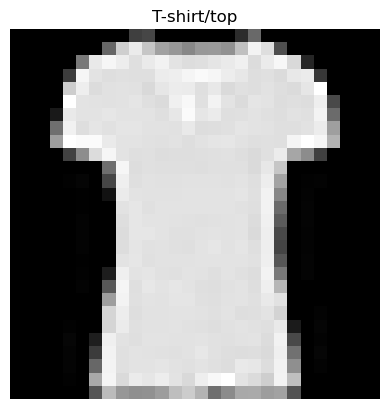

In [19]:
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap ='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"image size : {img.shape}")
print(f"label :{label},label_size : {label.shape}")

In [20]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
#x.shape
output = flatten_model(x)
print(x.shape,output.shape)
#output

torch.Size([1, 28, 28]) torch.Size([1, 784])


In [21]:
output.squeeze().shape

torch.Size([784])

In [22]:
from torch import nn
class FashionMNISYModelV0(nn.Module):
    def __init__(self,
                 input_shape :int ,
                 hidden_units : int ,
                 output_shape : int):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
                                         nn.Linear(in_features=input_shape,
                                                   out_features=hidden_units),
                                        nn.Linear(in_features=hidden_units,
                                                  out_features=output_shape))
    def forward(self,x):
        return self.layer_stack(x)

In [23]:
torch.manual_seed(42)
model_0 = FashionMNISYModelV0(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names))
model_0

FashionMNISYModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [24]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x).shape,model_0(dummy_x)

(torch.Size([1, 10]),
 tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
          -0.1004,  0.0157]], grad_fn=<AddmmBackward0>))

In [25]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [26]:
from helper_functions import accuracy_fn

In [27]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [28]:
from timeit import default_timer as timer
def print_train_time(start :float,
                    end : float,
                    device :torch.device = None):
    total_time = end - start
    print(f"Train time on {device}:{total_time :.3f} seconds ")
    return total_time

In [29]:
start_time = timer()
end_time = timer()
print_train_time(start = start_time,end = end_time,device = 'cpu')

Train time on cpu:0.000 seconds 


8.479994721710682e-05

In [30]:
from tqdm .auto import tqdm
torch.manual_seed(42)
train_time_start = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}\n---")
    
    train_loss =0 
    for batch,(X,y) in enumerate(train_dataloader):
        model_0.train()
        
        y_pred = model_0(X)
        
        loss =loss_fn(y_pred,y)
        
        train_loss += loss
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if batch % 400 == 0 :
            print(f"looked at : {batch * len(X)} /{len(train_dataloader.dataset)} samples. ")
            
    train_loss /= len(train_dataloader)
    test_loss ,test_acc = 0,0
    model_0.eval()
    
    with torch.inference_mode():
        for X_test,y_test in test_dataloader :
            
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred,y_test)
            
            test_acc +=  accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
        
    print(f"\ntrain loss : {train_loss:.4f} | test_loss : {test_loss:.4f} | test accuracy : {test_acc:.4f}")
    
train_time_end = timer()
total_train_time_model_0 = print_train_time(start = train_time_start,
                                            end = train_time_end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
---
looked at : 0 /60000 samples. 
looked at : 12800 /60000 samples. 
looked at : 25600 /60000 samples. 
looked at : 38400 /60000 samples. 
looked at : 51200 /60000 samples. 

train loss : 0.5904 | test_loss : 0.5095 | test accuracy : 82.0387
Epoch:1
---
looked at : 0 /60000 samples. 
looked at : 12800 /60000 samples. 
looked at : 25600 /60000 samples. 
looked at : 38400 /60000 samples. 
looked at : 51200 /60000 samples. 

train loss : 0.4763 | test_loss : 0.4799 | test accuracy : 83.1969
Epoch:2
---
looked at : 0 /60000 samples. 
looked at : 12800 /60000 samples. 
looked at : 25600 /60000 samples. 
looked at : 38400 /60000 samples. 
looked at : 51200 /60000 samples. 

train loss : 0.4550 | test_loss : 0.4766 | test accuracy : 83.4265
Train time on None:66.460 seconds 


In [31]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1))
        
        
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, 
            "model_loss": loss.item(),
            "model_acc": acc}
model_0_res = eval_model(model= model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_0_res

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISYModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

In [32]:
device = 'cude' if torch.cuda.is_available () else 'cpu'
device

'cpu'

In [33]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [34]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [35]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,hidden_units=10,output_shape=len(class_names))
next(model_1.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       requires_grad=True)

In [36]:
next(model_1.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       requires_grad=True)

In [37]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1 )

In [38]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):        
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) 

        optimizer.zero_grad()

        loss.backward()

       
        optimizer.step()

    
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() 
    with torch.inference_mode(): 
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) 
            )
        
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [39]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cpu:70.573 seconds 


In [40]:
model_1_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn
                            )
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [41]:
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code 
model_1_results = eval_model(model=model_1, 
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn) 
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [42]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, 
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [43]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

# Building CNN Model

In [69]:
class fashionmodelv2(nn.Module):
    def __init__( self , input_shape : int , hidden_units : int , output_shape : int ):
        super().__init__()
        
        self.conv_block_1 = nn.Sequential(nn.Conv2d(in_channels=input_shape,
                                                    out_channels=hidden_units,
                                                    kernel_size=3,
                                                    stride=1,
                                                    padding=1),    
                                          nn.ReLU(),
                                          nn.Conv2d(in_channels=hidden_units,
                                                    out_channels=hidden_units,
                                                    kernel_size=3,
                                                    stride=1,
                                                    padding=1),
                                          nn.ReLU(),
                                          nn.MaxPool2d(kernel_size=2))
        
        self.conv_block_2 = nn.Sequential(nn.Conv2d(in_channels=hidden_units,
                                                    out_channels=hidden_units,
                                                    kernel_size=3,
                                                   padding=1),
                                          nn.ReLU(),
                                           nn.Conv2d(in_channels=hidden_units,
                                                    out_channels=hidden_units,
                                                    kernel_size=3,
                                                    stride=1,
                                                    padding=1),
                                          nn.ReLU(),
                                          nn.MaxPool2d(kernel_size=2))
        self.classifier = nn.Sequential(nn.Flatten(),
                                       nn.Linear(in_features=hidden_units*7*7,
                                                 out_features=output_shape))
        
        def forward(self,x):
            x = self.conv_block_1(x)
            print(x.shape)
            x = self.conv_block_2(x)
            print(x.shape)
            x = self.classifier(x)
            return x

In [61]:
#torch.manual_seed(42)
#model_2 = fashionmodelv2(input_shape =  1 ,hidden_units = 10 , output_shape = len(class_names))

In [70]:
torch.manual_seed(42)
model_2 = FashionMNISYModelV2(input_shape=1,hidden_unit=10,output_shape=len(class_names))

In [71]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

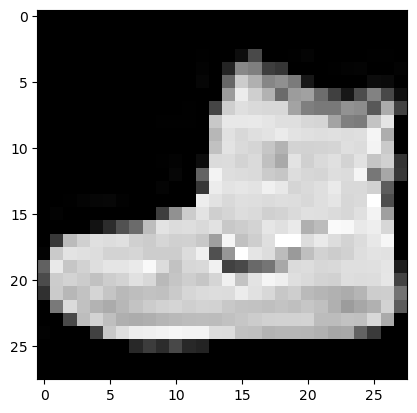

In [72]:
plt.imshow(image.squeeze(),cmap='gray')

In [73]:
image.shape

torch.Size([1, 28, 28])

In [74]:
rand_image_tensor = torch.randn(size =(1,28,28))


In [75]:
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

In [76]:
torch.manual_seed(42)
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

In [77]:
images.shape,test_image.shape

(torch.Size([32, 3, 64, 64]), torch.Size([3, 64, 64]))

In [78]:
conv_layer = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,stride=1,padding=0)
conv_output = conv_layer(test_image)
conv_output,test_image.shape

(tensor([[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
            6.6224e-01, -2.3216e-01],
          [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
           -1.8551e-01, -5.7622e-01],
          [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
            1.4923e-01,  1.4236e-01],
          ...,
          [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
            4.2594e-01, -4.8341e-01],
          [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
           -3.6626e-01,  3.5645e-01],
          [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
           -4.9680e-01, -7.2258e-01]],
 
         [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
           -1.7643e+00,  2.5263e-01],
          [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
            4.8068e-01,  8.4869e-01],
          [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
            2.4611e-01,  6.6233e-01],
          ...,
    

In [79]:
print(f"test image orignal shape : {test_image.shape} ")
print(f"test image unsqueeze : {test_image.unsqueeze(0).shape}")
max_pool_layer = nn.MaxPool2d(kernel_size=2)
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(test_image_through_conv.shape)
z=max_pool_layer(test_image_through_conv)
print(z.shape)

test image orignal shape : torch.Size([3, 64, 64]) 
test image unsqueeze : torch.Size([1, 3, 64, 64])
torch.Size([1, 10, 62, 62])
torch.Size([1, 10, 31, 31])


In [80]:
torch.manual_seed(42)
random_tensor = torch.randn(size =(1,1,2,2))
max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_tensor = max_pool_layer(random_tensor)
print(max_pool_tensor.shape)

torch.Size([1, 1, 1, 1])


# loss fun and optimizer

In [81]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [82]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

# Training and Testing Model_2

In [83]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59269 | Train accuracy: 78.44%
Test loss: 0.38841 | Test accuracy: 86.50%

Epoch: 1
---------
Train loss: 0.36040 | Train accuracy: 87.00%
Test loss: 0.35619 | Test accuracy: 87.12%

Epoch: 2
---------
Train loss: 0.32348 | Train accuracy: 88.25%
Test loss: 0.32324 | Test accuracy: 88.42%

Train time on cpu:142.346 seconds 


In [84]:
model_2_results = eval_model(model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn
                            )
model_2_results

{'model_name': 'FashionMNISYModelV2',
 'model_loss': 0.3232424259185791,
 'model_acc': 88.4185303514377}

In [86]:
import pandas as pd
compare_results  = pd.DataFrame([model_0_res,model_1_results,model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISYModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISYModelV2,0.323242,88.418530


In [87]:
compare_results['training_time'] =[total_train_time_model_0,total_train_time_model_1,total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISYModelV0,0.476639,83.426518,66.460299
1,FashionMNISTModelV1,0.685001,75.019968,70.573426
2,FashionMNISYModelV2,0.323242,88.418530,142.345911


Text(0, 0.5, 'model')

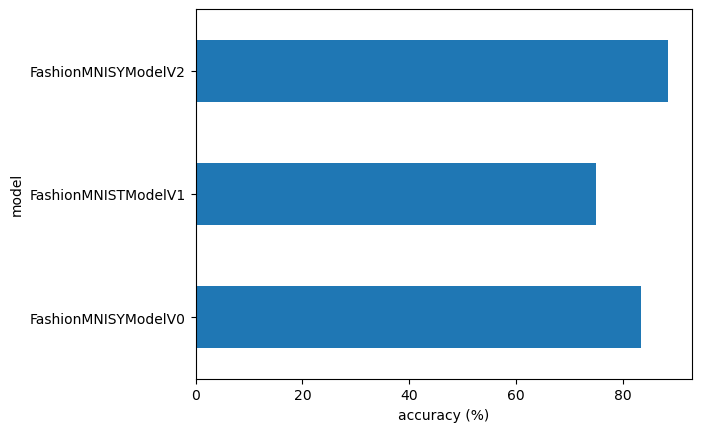

In [88]:
compare_results.set_index('model_name')['model_acc'].plot(kind ='barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model')

In [89]:
def make_predictions(model:torch.nn.Module,
                    data : list,
                    device:torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data :
            sample = torch.unsqueeze(sample,dim=0).to(device)
            
            pred_logits = model(sample)
            
            pred_prob = torch.softmax(pred_logits.squeeze(),dim=0)
            
            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)

In [90]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [91]:
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.2124e-04, 1.6734e-06, 4.1972e-05, 3.0043e-04, 3.9390e-05, 9.9388e-01,
         1.6077e-05, 3.2671e-04, 5.0900e-03, 1.8379e-04],
        [3.3143e-06, 3.4264e-06, 8.0080e-07, 8.0036e-05, 6.8486e-05, 3.5456e-02,
         3.6639e-07, 9.6368e-01, 3.1705e-05, 6.7702e-04]])

In [92]:
test_labels

[5, 7, 3, 7, 0, 6, 5, 7, 1]

In [93]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 7, 6, 7, 0, 8, 5, 7, 1])

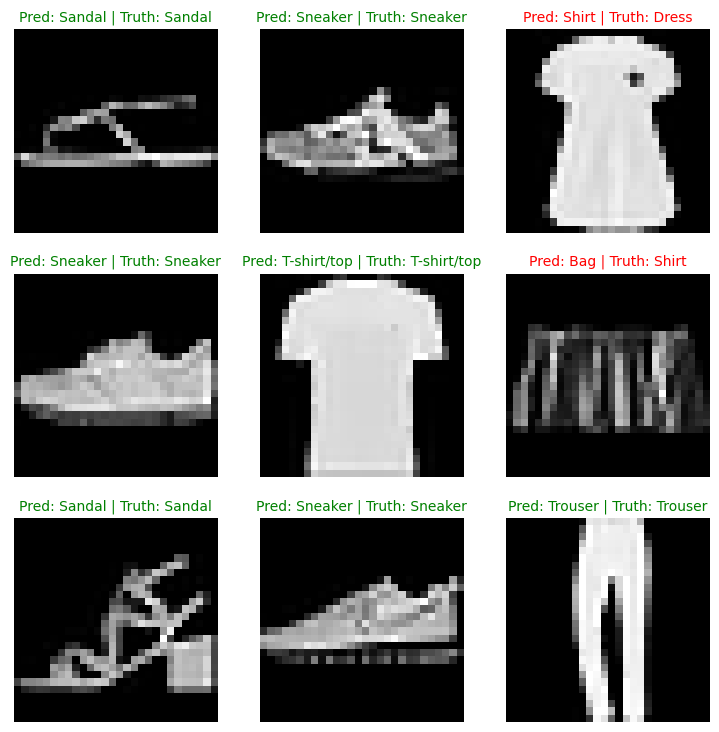

In [94]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

# Making a confusion matrix for further prediction evaluation 

In [95]:
from tqdm.auto import tqdm

In [96]:
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [107]:
pip show transformers

Name: transformersNote: you may need to restart the kernel to use updated packages.

Version: 2.1.1
Summary: State-of-the-art Natural Language Processing for TensorFlow 2.0 and PyTorch
Home-page: https://github.com/huggingface/transformers
Author: Thomas Wolf, Lysandre Debut, Victor Sanh, Julien Chaumond, Google AI Language Team Authors, Open AI team Authors, Facebook AI Authors, Carnegie Mellon University Authors
Author-email: thomas@huggingface.co
License: Apache
Location: C:\ProgramData\anaconda3\Lib\site-packages
Requires: boto3, numpy, regex, requests, sacremoses, sentencepiece, tqdm
Required-by: 


In [108]:
pip install --upgrade transformers

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/7.4 MB ? eta -:--:--
                                              0.0/7.4 MB 1.3 MB/s eta 0:00:06
                                              0.1/7.4 MB 544.7 kB/s eta 0:00:14
                                              0.1/7.4 MB 655.4 kB/s eta 0:00:12
                                              0.1/7.4 MB 654.9 kB/s eta 0:00:12
                                              0.2/7.4 MB 654.6 kB/s eta 0:00:12
     -                                        0.2/7.4 MB 692.9 kB/s eta 0:00:11
     -                                        0.2/7.4 MB 686.8 kB/s eta 0:00:11
     -                                        0.3/7.4 MB 710.0 kB/s eta 0:00:11
     -                                        0.3/7.4 MB 731.4 kB/s eta 0:00:10
     -                                        0.3/7.4 MB 723.4 kB/s eta 0:00:10
     -                                        0.4/7.4

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [110]:
pwd

'C:\\Users\\Mostafa\\Downloads\\Artificial Intelligence\\Pytorch'

In [ ]:
sys.path.append('/path/to/transformers')

In [109]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

The system cannot find the file specified.


ImportError: cannot import name 'AutoModelForMaskedLM' from 'transformers' (C:\ProgramData\anaconda3\Lib\site-packages\transformers\__init__.py)

In [ ]:
import mlxtend

In [ ]:
mlxtend.__version__

In [ ]:
y_pred_tensor[:10]

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
confmat = ConfusionMatrix(num_classes = len(class_names),task='multiclass')
confmat_tensor = confmat(preds =y_pred_tensor,target =test_data.targets)

In [ ]:
confmat_tensor

In [ ]:
fig,ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),class_names=class_names,figsize=(10,7))

In [ ]:
from pathlib import Path
model_path =Path('models')
model_path.mkdir(parents=True,exist_ok=True)
model_name ="03_pytorch_computer_vision_model_2.pth"
model_save_path = model_path / model_name
model_save_path

In [ ]:
print(f"Saving model to: {model_save_path}")
torch.save(obj=model_2.state_dict(),f=model_save_path)

In [ ]:
test_image.shape

In [ ]:
torch.manual_seed(42)
loaded_model_2 = FashionMNISYModelV2(input_shape=1,hidden_unit=10,output_shape=len(class_names))
loaded_model_2.load_state_dict(torch.load(f=model_save_path))

In [ ]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results